<center><h1> Uma visão geral das Olimpiadas </h1></center>

### Integrantes:
    - Caio Lucas da Silva Chacon              | Matrícula: 20200025769
    - Luiz Fernando Costa dos Santos          | Matrícula: 20200025446
    - Moisés Filipe Coutinho Correia Santos   | Matrícula: 20200025689

<img src="https://images.unsplash.com/photo-1569517282132-25d22f4573e6?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1133&q=80">
<center>From Unsplash, by:Bryan Turner</center>

## Introdução e objetivos

Os jogos olímpicos são um evento global onde diversas modalidades esportivas se reunem a cada dois anos, alternando entre jogos olímpicos de verão e de inverno. Eles são extremamente importantes, pois, além de representar o ápice da vida de um atleta, também movimentam a economia do país sede, atraindo turistas de todo o mundo. Por isso, todos os jogos são reportados detalhadamente, gerando uma crescente demanda por informação por parte dos espectadores. Portanto, para atender esta demanda, faz-se necessário prover informação sobre os jogos olímpicos de forma clara, precisa e fácil de entender.

Para tanto, os conceitos de Jornalismo Guiado por Dados (Data-Driven Journalism) são essenciais para alcançar os objetivos previamente citados. Segundo [Adrian Holovaty (2006)](http://www.holovaty.com/writing/fundamental-change/) a incorporação de técnicas de gerencimento de bases de dados ao cotidiano das redações gera notícias e informações mais precisas e bem estruturadas. A partir disso, baseamos nosso trabalho nessa premissa, isto é, buscamos apresentar o mundo dos jogos olímpicos e seus atletas para um novo leitor de forma interativa e atraente de forma que possa servir de estímulo para um maior aprofundamento do leitor no tema.

Após o atraso das Olímpiadas de Tokyo em 2020 devido a pandemia do novo Coronavírus SARS-CoV-2, finalmente foi anunciada a nova data para a realização do evento: 24/07/2021. Com menos de um mês para o início da maior e mais consagrada competição esportiva do mundo, iremos desbravar o histórico do torneio e fazer uma análise descritiva dos seus dados, buscando apresentar uma visão guiada por dados e não por opiniões.

### Objetivo geral:
- Apresentar e analisar os dados dos atletas olímpicos de forma a explorar diversas dimensões da competição utilizando variáveis como: sexo, nacionalidade, desempenho etc. Ao final da análise esperamos obter informações coerentes capazes de apresentar algo novo ao leitor.   

### Objetivos específicos:
- Compreender o alcance internacional da competição;
- Apresentar os países com maior número de medalhas com o decorrer do tempo;
- Analisar o percentual de atletas masculinos e femininos ao longo das edições;
- Elencar os anos com maior participação masculina e feminina;
- Elencar os maiores medalhistas masculinos e femininos;
- Analisar a pirâmide etária dos atletas masculinos e femininos;
- Descobrir como o peso e a altura dos atletas influenciam na quantidade de medalhas obtidas;
- Elencar os atletas com maior número de medalhas.

### Bibliotecas utilizadas

Para a análise, as seguintes bibliotecas foram utilizadas:

Você pode encontrar a versão delas [nessa página](https://raw.githubusercontent.com/caiochacon/projeto_final_ICD/main/requiriments.txt)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.graph_objects as go
import requests

from bs4 import BeautifulSoup
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from IPython.core.display import display, HTML

sns.set_palette("twilight")
warnings.filterwarnings("ignore")

### Dados

Os dados foram obtidos no [Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) e serviram como base para todo o projeto. O arquivo athlete_events.csv contém 271116 linhas e 15 colunas, abrangendo os jogos de Athenas em 1896 até os jogos no Rio em 2016. Cada linha corresponde a um atleta individual competinto em um evento olimpico. As colunas são:

- ID (inteiro): Número único para cada atleta;
- Name (string): Nome do atlet;
- Sex (string): Sexo do atleta (Masculino ou Feminino);
- Age (inteiro): Idade do atleta;
- Height (float): Altura do atleta (em centimetros);
- Weight (float): Peso do atleta (em kilogramas);
- Team (string): Nome do time;
- NOC (string): Código de 3 letras do Comitê Olímpico Nacional para um país;
- Games (string): Ano e estação em que a edição da olimpíada acontece;
- Year (inteiro): Ano em que a edição da olimpíada acontece;
- Season (string): Estação em que a olimpíada acontece (verão ou inverno);
- City (string): Cidade sede da edição das olimpíadas;
- Sport (string): Modalidade esportiva que o atleta participou;
- Event (string): Descrição da categoria evento esportivo;
- Medal (string): Informa qual medalha o atleta ganhou (ouro, prata, bronze ou nenhuma[nan]). 

In [2]:
PATH = "athlete_events.csv" 

df = pd.read_csv(PATH)  
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

Aqui é mensurado a centralidade e dispersão da altura, peso e idade dos atletas

In [3]:
physiological_cols = ["Age", "Height", "Weight"]

df[physiological_cols].describe().iloc[1:,]

Age      Height      Weight
mean  25.556898  175.338970   70.702393
std    6.393561   10.518462   14.348020
min   10.000000  127.000000   25.000000
25%   21.000000  168.000000   60.000000
50%   24.000000  175.000000   70.000000
75%   28.000000  183.000000   79.000000
max   97.000000  226.000000  214.000000

Percebe-se que boa parte dos atletas estão na faixa dos 21 e 28 anos, a média de altura é de 175 cm, que é basicamente idêntica à mediana. Assim como o peso, que fica na faixa dos 70 kg.

Vimos também a quantidade de medalhas distribuindo em toda a história

In [4]:
df_medal = df[df['Medal'] != 'No medal']
print("Quantidade de medalhas distribuidas ao longo de todas as edições")
print("Medalhas de ouro: ", df_medal['Medal'].value_counts()[0])
print("Medalhas de bronze: ", df_medal['Medal'].value_counts()[1])
print("Medalhas de prata: ", df_medal['Medal'].value_counts()[2])

Quantidade de medalhas distribuidas ao longo de todas as edições
Medalhas de ouro:  13372
Medalhas de bronze:  13295
Medalhas de prata:  13116


In [5]:
print("Quantidade de modalidades que já existiram: ", len(df['Sport'].unique()))

Quantidade de modalidades que já existiram:  66


### Pré-processamento

O pré-processamento foi feito para resolver o problema com valores ausentes e permitir que novas analises sejam realizadas mais abaixo. Todo o pré-processamento está aqui, porém ele foi realizado em momentos diferentes, adaptados para a necessidade do momento.

In [6]:
# Procurando por valores ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Para transformar os valores faltantes serão usados os valores da média de cada esporte em que o atleta participa. Essa é uma boa escolha porque preserva as principais características de cada esporte. Por exemplo: atletas de basquete são geralmente mais altos que a média dos outros competidores.

In [7]:
# Transforma valores nulos pela média de idade do esporte
mean_age_by_sport = df.groupby("Sport").mean().reset_index().drop(columns = ["Height","Year","ID","Weight"])
mean_age_dict = dict(zip(mean_age_by_sport["Sport"],mean_age_by_sport["Age"]))

null_ages = df[pd.isnull(df["Age"])]
null_ages["Age"] = null_ages["Sport"].map(mean_age_dict)
df["Age"].fillna(null_ages["Age"],inplace=True) # 9474 valores transformados

# Transforma valores nulos pela média de altura do esporte
mean_height_by_sport = df.groupby("Sport").mean().reset_index().drop(columns = ["Age","Year","ID","Weight"])
mean_height_dict = dict(zip(mean_height_by_sport["Sport"],mean_height_by_sport["Height"]))

null_heights = df[pd.isnull(df["Height"])]
null_heights["Height"] = null_heights["Sport"].map(mean_height_dict)
df["Height"].fillna(null_heights["Height"],inplace=True) # 60072 valores transformados

# Transforma valores nulos pela média de peso do esporte
mean_weight_by_sport = df.groupby("Sport").mean().reset_index().drop(columns = ["Age","Year","ID","Height"])
mean_weight_dict = dict(zip(mean_weight_by_sport["Sport"],mean_weight_by_sport["Weight"]))

null_weights = df[pd.isnull(df["Weight"])]
null_weights["Weight"] = null_weights["Sport"].map(mean_weight_dict)
df["Weight"].fillna(null_weights["Weight"],inplace=True) # 62658 valores transformados
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271017 non-null  float64
 5   Weight  270899 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [8]:
# Transforma os valores nulos de medalha por "No medal"
df["Medal"].fillna("No medal",inplace=True)

In [9]:
# Exclui os valores nulos remanescentes, uma vez que não existem mais boas abordagens 
# para transformá-los
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270899 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      270899 non-null  int64  
 1   Name    270899 non-null  object 
 2   Sex     270899 non-null  object 
 3   Age     270899 non-null  float64
 4   Height  270899 non-null  float64
 5   Weight  270899 non-null  float64
 6   Team    270899 non-null  object 
 7   NOC     270899 non-null  object 
 8   Games   270899 non-null  object 
 9   Year    270899 non-null  int64  
 10  Season  270899 non-null  object 
 11  City    270899 non-null  object 
 12  Sport   270899 non-null  object 
 13  Event   270899 non-null  object 
 14  Medal   270899 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 33.1+ MB


In [10]:
# Transforma idade, altura e peso em inteiros
df = df.astype({"Age":int,"Height":int,"Weight":int})
df.head()

ID                      Name Sex  Age  Height  Weight            Team  NOC  \
0   1                 A Dijiang   M   24     180      80           China  CHN   
1   2                  A Lamusi   M   23     170      60           China  CHN   
2   3       Gunnar Nielsen Aaby   M   24     175      70         Denmark  DEN   
3   4      Edgar Lindenau Aabye   M   34     182      95  Denmark/Sweden  DEN   
4   5  Christine Jacoba Aaftink   F   21     185      82     Netherlands  NED   

         Games  Year  Season       City          Sport  \
0  1992 Summer  1992  Summer  Barcelona     Basketball   
1  2012 Summer  2012  Summer     London           Judo   
2  1920 Summer  1920  Summer  Antwerpen       Football   
3  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event     Medal  
0       Basketball Men's Basketball  No medal  
1      Judo Men's Extra-Lightweight  No medal  
2           Football Men's Football  No medal  
3       Tug-Of-War Men's Tug-Of-War      Gold  
4  Speed Skating Women's 500 metres  No medal

<center><h2>As olimpiadas de verão sempre foram uma competição global?</h2></center>
<img src="https://images.unsplash.com/photo-1526470608268-f674ce90ebd4?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=967&q=80" 
width=800>
<center>From Unsplash, by:Joshua Rawson-Harris</center>

In [11]:
summer = df[df["Season"] == "Summer"]

s1896 = summer[summer["Year"] == 1896]["NOC"].value_counts()
s1936 = summer[summer["Year"] == 1936]["NOC"].value_counts()
s1976 = summer[summer["Year"] == 1976]["NOC"].value_counts()
s2016 = summer[summer["Year"] == 2016]["NOC"].value_counts()

In [12]:
def to_map(data):
    df_map = pd.DataFrame(data)
    df_map = df_map.reset_index()
    
    df_map.columns = ["NOC", "Atletes"]
    return df_map

In [13]:
df1896 = to_map(s1896)
df1936 = to_map(s1936)
df1976 = to_map(s1976)
df2016 = to_map(s2016)

In [14]:
fig = px.scatter_geo(df1896, locations="NOC", color="NOC",
                     hover_name="NOC", size='Atletes',
                     projection="equirectangular", title='Distribuição de países nos Jogos Olímpicos de 1896', 
                     size_max=28)
fig.update_layout(title={'y':0.9, 'x':0.5,'xanchor': 'center', 'yanchor': 'top'},
                  font=dict(size=16), template="simple_white")
fig.show()

In [15]:
fig = px.scatter_geo(df1936, locations="NOC", color="NOC",
                     hover_name="NOC", size='Atletes',
                     projection="equirectangular", title='Distribuição de países nos Jogos Olímpicos de 1936', 
                     size_max=28)
fig.update_layout(title={'y':0.9, 'x':0.5,'xanchor': 'center', 'yanchor': 'top'},
                  font=dict(size=16), template="simple_white")
fig.show()

In [16]:
fig = px.scatter_geo(df1976, locations="NOC", color="NOC",
                     hover_name="NOC", size='Atletes',
                     projection="equirectangular", title='Distribuição de países nos Jogos Olímpicos de 1976', 
                     size_max=28)
fig.update_layout(title={'y':0.9, 'x':0.5,'xanchor': 'center', 'yanchor': 'top'},
                  font=dict(size=16), template="simple_white")
fig.show()

In [17]:
fig = px.scatter_geo(df2016, locations="NOC", color="NOC",
                     hover_name="NOC", size='Atletes',
                     projection="equirectangular", title='Distribuição de países nos Jogos Olímpicos de 2016', 
                     size_max=28)
fig.update_layout(title={'y':0.9, 'x':0.5,'xanchor': 'center', 'yanchor': 'top'},
                  font=dict(size=16), template="simple_white")
fig.show()

Percebe-se uma clara globalização dos Jogos, dado que em 1896, há apenas um representante das Amércas e um da Oceania (o restante são Europeus) e em 2016 temos representantes de todos os continentes do planeta.

Deve-se também atentar para a quantidade de atletas africanos, que, apesar de ter crescido nos ultimos jogos, ainda possui muitos poucos representantes, dado o tamanho territorial do continente. 

### Bar chart race

Para mostrar os países com mais medalhas olímpicas durante toda a história, os esportes em que os EUA foi mais vencedor ao longo do tempo até o Rio 2016 e que o Brasil foi mais ganhador ao decorrer da história até hoje, foi-se utilizado o Bar chart race.

Os gráficos de corridas são uma forma de visualização de dados muito eficiente para mostrar mudanças de cenários durante um período de tempo com certa elegância. 

No python existe um framework para a criação desses gráficos, chamado [bar-chart-race](https://www.dexplo.org/bar_chart_race/), porém é ainda uma ferramenta em desenvolvimento e com poucas opções de costomização. Portanto, uma solução externa ao python foi a solução: O [Flourish](https://flourish.studio/). Este Web Site é uma aplicação de visualização de dados profissional, utilizado por diversas empresas, que oferece diversas opções de personalização para os gráficos. Para utilização do Flourish, os dados precisaram ser modificados para o modelo aceito pelo Web Site (ver o pré-processamento).

Assim foram criados os seguintes gráficos de corrida:

- Top 15 países medalhistas olimpicos ao longo do tempo;   
- Brasil nas Olimpiadas: medalhas por esporte ao longo do tempo;
- EUA nas Olimpiadas: medalhas por esporte ao longo do tempo.

**As células que apresentam gráficos do flourish precisam ser executadas. Do contrário, o gráfico não será apresentado.**

### Top 15 países com maior número de medalhas olímpicas
Percebe-se uma larga liderança dos Norte-Americanos durante toda a história dos jogos modernos com, atualmente, mais que o dobro de medalhas para o segundo colocado, este que é um caso curioso: A extinta União das Repúblicas Socialistas Soviéticas. O país que protagonizou a Guerra Fria com os EUA, até hoje é o segundo maior medalhista da história (o país foi extinto em 1991) com 2063 medalhas e chegou neste patamar justamente no período do conflito, onde sempre procurava competir com os Capitalistas.

In [18]:
flourish_url = "<iframe src='https://flo.uri.sh/visualisation/6409642/embed' title='Interactive or visual content' class='flourish-embed-iframe' frameborder='0' scrolling='no' style='width:100%;height:600px;' sandbox='allow-same-origin allow-forms allow-scripts allow-downloads allow-popups allow-popups-to-escape-sandbox allow-top-navigation-by-user-activation'></iframe><div style='width:100%!;margin-top:4px!important;text-align:right!important;'><a class='flourish-credit' href='https://public.flourish.studio/visualisation/6409642/?utm_source=embed&utm_campaign=visualisation/6409642' target='_top' style='text-decoration:none!important'><img alt='Made with Flourish' src='https://public.flourish.studio/resources/made_with_flourish.svg' style='width:105px!important;height:16px!important;border:none!important;margin:0!important;'> </a></div>"
#geralzao
display(HTML(flourish_url))

### Brasil nas Olimpiadas: medalhas por esporte ao longo do tempo
O país do futebol ganhou suas primeiras medalhas olímpicas no shooting e ficou até 1936 somente com as medalhas deste esporte. O desenvolvimento do Brasil para os jogos passa a ser mais evidente depois dos anos 90, e sempre se destacando mais os esportes coletivos como basquete (até os anos 2000), futebol e voleybol. 

	OBS: É importante ressaltar que as medalhas do gráfico são por atletas individualmente.

In [19]:
flourish_url_br = "<iframe src='https://flo.uri.sh/visualisation/6500927/embed' title='Interactive or visual content' class='flourish-embed-iframe' frameborder='0' scrolling='no' style='width:100%;height:600px;' sandbox='allow-same-origin allow-forms allow-scripts allow-downloads allow-popups allow-popups-to-escape-sandbox allow-top-navigation-by-user-activation'></iframe><div style='width:100%!;margin-top:4px!important;text-align:right!important;'><a class='flourish-credit' href='https://public.flourish.studio/visualisation/6500927/?utm_source=embed&utm_campaign=visualisation/6500927' target='_top' style='text-decoration:none!important'><img alt='Made with Flourish' src='https://public.flourish.studio/resources/made_with_flourish.svg' style='width:105px!important;height:16px!important;border:none!important;margin:0!important;'> </a></div>"
#apenas br
display(HTML(flourish_url_br))

### EUA nas Olimpiadas: medalhas por esporte ao longo do tempo
O país do Fast-Food tem como seu carro chefe nos esportes o Atletismo. Os EUA venceram até 1948 mais de 500 medalhas neste esporte. A natação evoluiu muito e se tornou (por uma diferença de duas medalhas para o primeiro) o segundo esporte mais medalhista do país de Michael Felps. Uma curiosidade é o Remo permear entre os esportes mais vencedores da gloriosa história olimpica dos americanos, superando até mesmo o poderoso basquete do país.

	OBS: É importante ressaltar que as medalhas do gráfico são por atletas individualmente.

In [20]:
flourish_url_us = "<iframe src='https://flo.uri.sh/visualisation/6502031/embed' title='Interactive or visual content' class='flourish-embed-iframe' frameborder='0' scrolling='no' style='width:100%;height:600px;' sandbox='allow-same-origin allow-forms allow-scripts allow-downloads allow-popups allow-popups-to-escape-sandbox allow-top-navigation-by-user-activation'></iframe><div style='width:100%!;margin-top:4px!important;text-align:right!important;'><a class='flourish-credit' href='https://public.flourish.studio/visualisation/6502031/?utm_source=embed&utm_campaign=visualisation/6502031' target='_top' style='text-decoration:none!important'><img alt='Made with Flourish' src='https://public.flourish.studio/resources/made_with_flourish.svg' style='width:105px!important;height:16px!important;border:none!important;margin:0!important;'> </a></div>"
#apenas us
display(HTML(flourish_url_us))

In [21]:
summer["Medal"] = summer["Medal"] != "No medal"

In [22]:
df_reg = summer.loc[summer["Year"] >= 1890].drop_duplicates().groupby(["Year", "NOC"])["ID",].count().reset_index()
df_reg["Medal"] = summer.loc[summer["Year"] >= 1890].drop_duplicates().groupby(["Year", "NOC"])["Medal"].sum().reset_index()["Medal"].values
df_reg.columns = ["Year", "NOC", "Size_of_Delegation", "Medal"]

In [23]:
apr = df_reg.groupby("NOC").sum()
apr["Aproveitamento"] = apr["Medal"]/apr["Size_of_Delegation"]

In [24]:
apr = apr[apr["Size_of_Delegation"] > 100]
apr = apr["Aproveitamento"].sort_values(ascending=False).head(10)

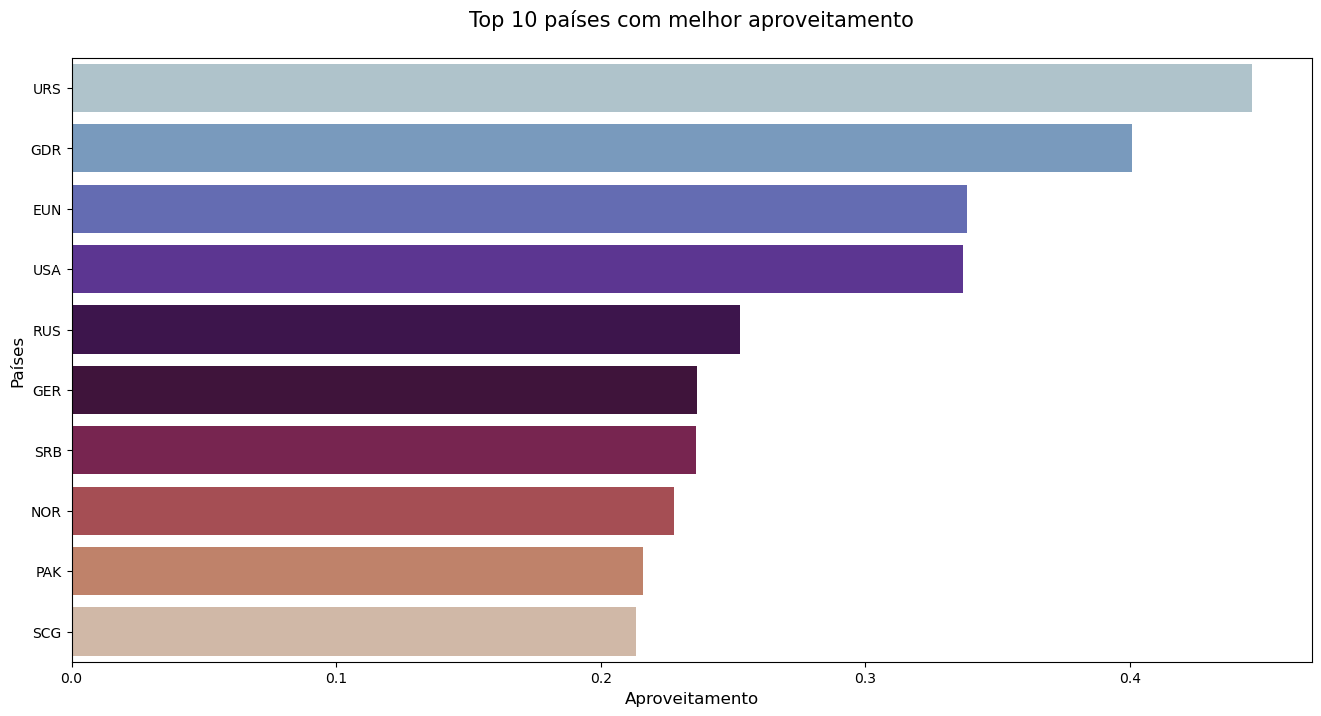

In [25]:
plt.figure(figsize=(16,8), dpi=100)
sns.barplot(x=apr.values,
            y=apr.index, 
            saturation=0.90, palette="twilight")
plt.xlabel("Aproveitamento", fontsize=12)
plt.ylabel("Países", fontsize=12)
plt.title("Top 10 países com melhor aproveitamento\n", fontsize=15)
plt.show()

- GUERRA FRIA OLIMPICA?

É inegável que os EUA são os maiores campeões das olimpidas, mas o gráfico acima mostra que o maior aproveitamento é da URSS. Desta forma, será que na disputa entre Estados Unidos e União Soviética, os EUA realmente foram vencedores no questio olimpico? Será que se a União Soviética ainda existisse, eles ultrapassariam os EUA? (ver o BarChart Race).

- Grandes Conquistas, Pequenas Equipes?

Além disso, percebe-se um alto número de países não tão desenvolvidos, como o PAK, SCG e EUN, o que pode ser explicado por poucas participações nas olimpiadas, porém com grande efetividade por parte dos atletas que foram recrutados.

<center><h2>Analisando as diferenças entre sexo</h2></center>
<img src="https://stillmed.olympic.org/media/Photos/2016/08/13/part-1/13-08-2016-Athletics-100m-Women-03.jpg" 
width=800>
<center>From Olimpics website</center>

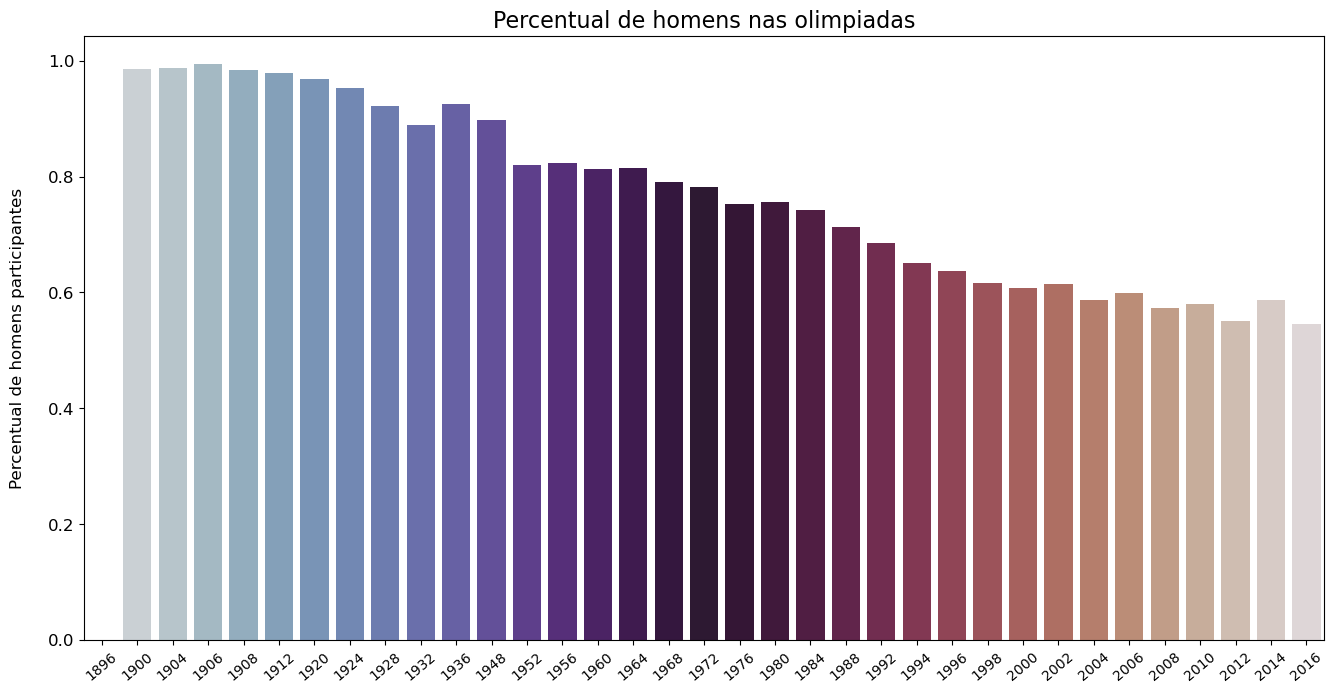

In [26]:
male = df[df['Sex'] == 'M']
female = df[df['Sex'] == 'F']

male['Unique'] = 1
female['Unique'] = 1

group_male = male.groupby("Year").sum()
group_female = female.groupby("Year").sum()
group_male['Total'] = group_male['Unique'] / (group_male['Unique'] + group_female['Unique'])
group_female['Total'] = group_female['Unique'] / (group_male['Unique'] + group_female['Unique'])

plt.figure(figsize=(16,8), dpi=100)
sns.barplot(x=group_male.index, y=group_male['Total'], palette="twilight")
plt.yticks(fontsize=12)
plt.xlabel("")
plt.ylabel("Percentual de homens participantes\n", fontsize=12)
plt.title("Percentual de homens nas olimpiadas", fontsize=16)
plt.xticks(rotation=40)
plt.show()

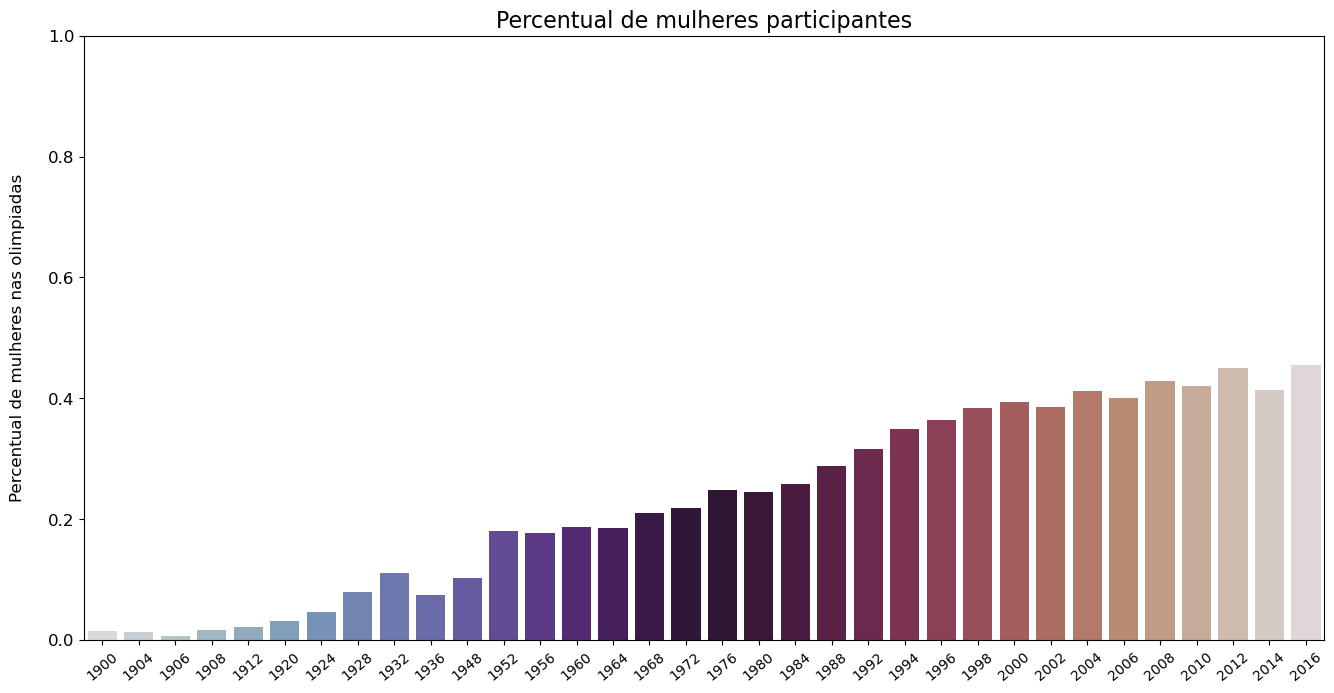

In [27]:
plt.figure(figsize=(16,8), dpi=100)
sns.barplot(x=group_female.index, y=group_female['Total'], palette="twilight")
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.xlabel("")
plt.ylabel("Percentual de mulheres nas olimpiadas\n", fontsize=12)
plt.title("Percentual de mulheres participantes", fontsize=16)
plt.xticks(rotation=40)
plt.show()

Como vemos nos dois gráficos acima, a quantidade de mulheres participando das olimpiadas foi gradativamente crescendo, e, nos ultimos anos, as quantidades de participantes homens e mulheres parecem estar equilibrados.

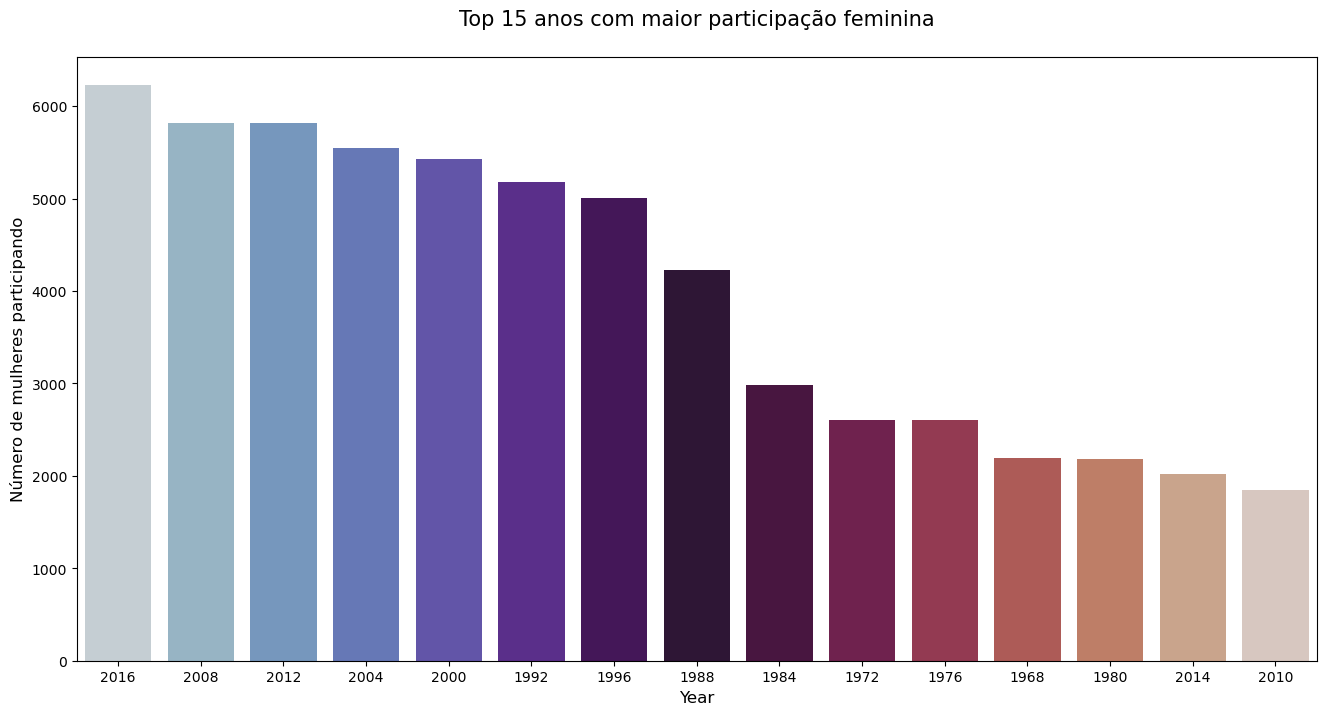

In [28]:
plt.figure(figsize=(16,8), dpi=100)
sns.barplot(x=female['Year'].value_counts(ascending=False).head(15).index.astype('str'),
            y=female['Year'].value_counts(ascending=False).head(15).values, 
            saturation=0.90, palette="twilight")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Número de mulheres participando", fontsize=12)
plt.title("Top 15 anos com maior participação feminina\n", fontsize=15)
plt.show()

Esse destaque mostra que os anos mais recentes, com exceção de 2010 e 2014, são os que mais contaram com a participação feminina (em números brutos)

In [29]:
# O seguinte código serve para organizar os dados para poder colocar na piramide etária abaixo

m = male['Age'].value_counts()
f = female['Age'].value_counts()

f_aux = {10: 0}
f_aux = pd.Series(f_aux)
f = f.append(f_aux)

m = m.sort_index()
f = f.sort_index()

man = {}
acumulador = 0

for i in range(6, 74, 6):
    if i <= 42:
        temp = m[i-6:i]
        man[f'{temp.index[0]}-{temp.index[-1]}'] = temp.sum()
    else:
        temp = m[i-6:i]
        acumulador += temp.sum()
man['52+'] = acumulador + 2

'''
Tanto o + 2 ao fim desse código quanto o -8 abaixo servem para
compensar os valores que não são pegos pelo loop do for.
Por exemplo: o for acima só vai até o 72, ele deixa o 73 e o 74 de fora. 
'''

woman = {}
acumulador = 0

for i in range(6, 62, 6):
    if i <= 42:
        temp = f[i-6:i]*-1
        woman[f'{temp.index[0]}-{temp.index[-1]}'] = temp.sum()
    else:
        temp = f[i-6:i]*-1
        acumulador += temp.sum()
woman['52+'] = acumulador - 8
woman

{'10-15': -2850,
 '16-21': -25480,
 '22-27': -29591,
 '28-33': -12790,
 '34-39': -2722,
 '40-45': -685,
 '46-51': -221,
 '52+': -176}

In [30]:
# Pirâmide etária

layout = go.Layout(yaxis=go.layout.YAxis(title='Age'),
                   xaxis=go.layout.XAxis(
                       range=[-95000, 95000],
                       tickvals=np.arange(-95000, 95001, 19000),
                       ticktext=np.arange(-95000, 95001, 19000)),
                   barmode='overlay',
                   bargap=0.1,
                   title='Pirâmide etária dos atletas olimpicos')

data = [go.Bar(y=['10-15', '16-21', '22-27', '28-33', '34-39', '40-45','46-51', '52+'],
               x=pd.Series(man).values,
               orientation='h',
               name='Men',
               hoverinfo='x',
               marker=dict(color='crimson')
               ),
        go.Bar(y=['10-15', '16-21', '22-27', '28-33', '34-39', '40-45','46-51', '52+'],
               x=pd.Series(woman).values,
               orientation='h',
               name='Women',
               text=-1 * pd.Series(woman),
               hoverinfo='text',
               marker=dict(color='teal')
               )]


go.Figure(data=data, layout=layout)

Com essa pirâmide etária podemos perceber a clara maioria masculina nas olimpíadas, principalmente entre os 22-33 anos. Como estamos levando em consideração dados de todos os anos, temos que a quantidade de participantes homens é bem maior, visto que, como foi visto no gráfico anterior, nos primeiros anos de olimpíadas a quantidade de homens era bem maior proporcionalmente.

Agora que vimos a diferença existente na quantidade e idade dos homens e mulheres que participaram das olimpiadas, vamos dar uma olhada na distribuição de altura e peso desses atletas.

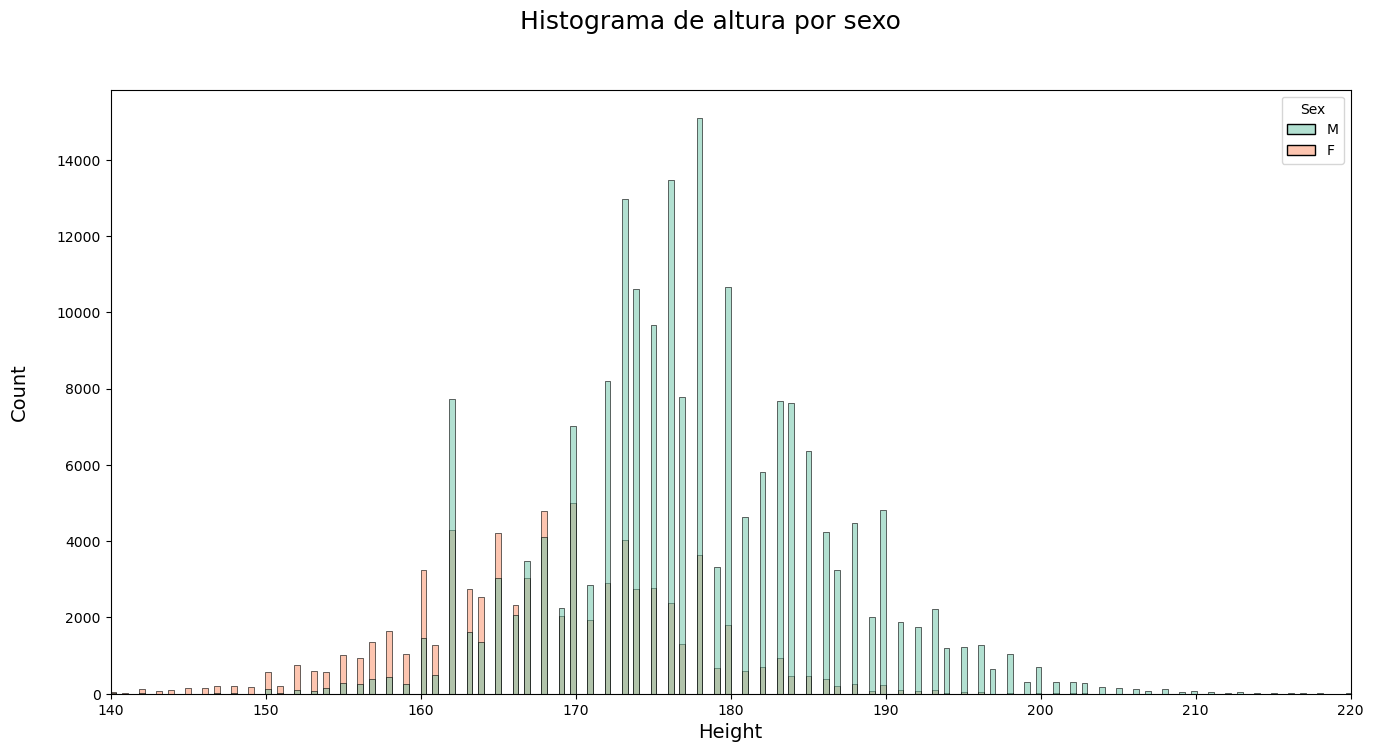

In [31]:
plt.figure(figsize=(16,8), dpi=100)
plt.suptitle("Histograma de altura por sexo", fontsize=18)
plt.xlim(140, 220)

sns.histplot(data=df, x="Height", color="indigo", hue='Sex',  palette='Set2')
plt.xlabel("Height", fontsize=14)
plt.ylabel("Count\n", fontsize=14)

plt.show()

Na distribuição de altura, temos que a altura dos homens tende a ser maior que a das mulheres.{

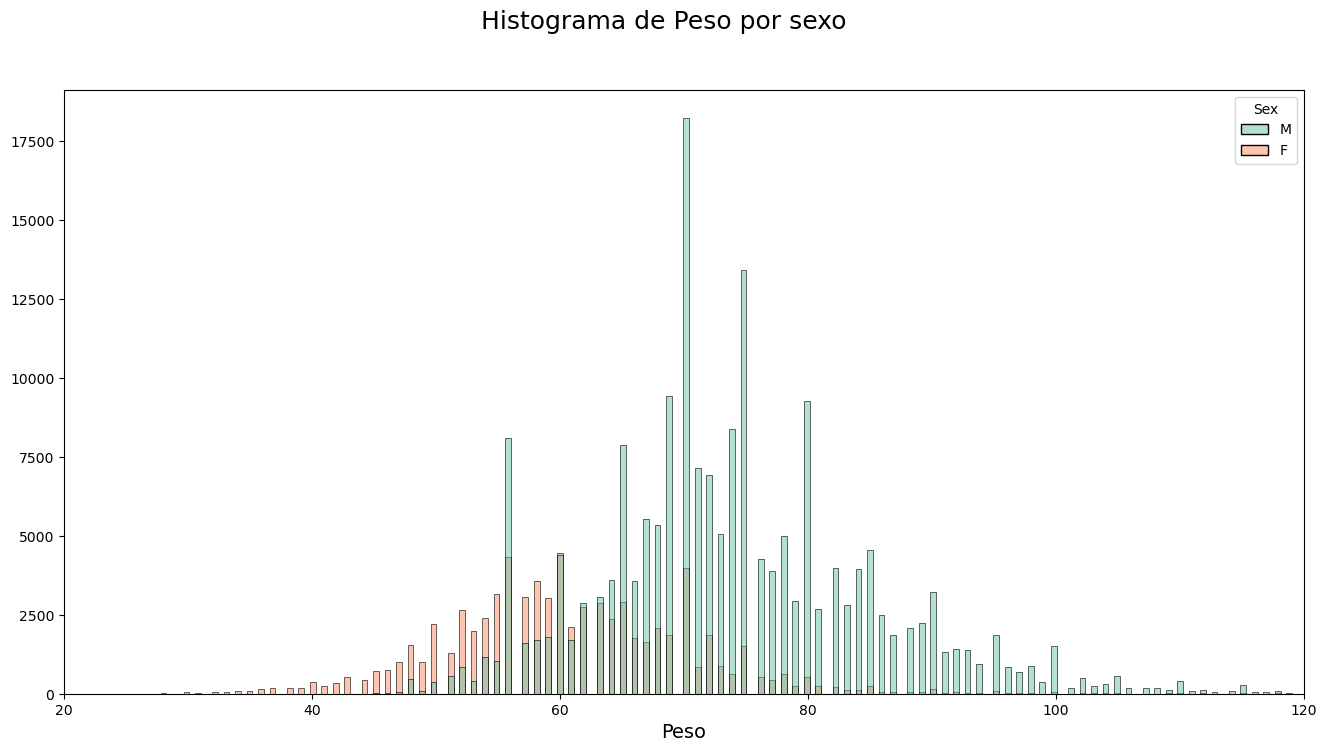

In [32]:
plt.figure(figsize=(16,8), dpi=100)
plt.suptitle("Histograma de Peso por sexo", fontsize=18)
plt.xlim(20, 120)

sns.histplot(data=df, x="Weight", color="steelblue", hue='Sex', palette='Set2')
plt.xlabel("Peso", fontsize=14)
plt.ylabel("")

plt.show()

E o mesmo acontece com a distribuição do peso. Iremos descobrir o porquê disso logo abaixo.

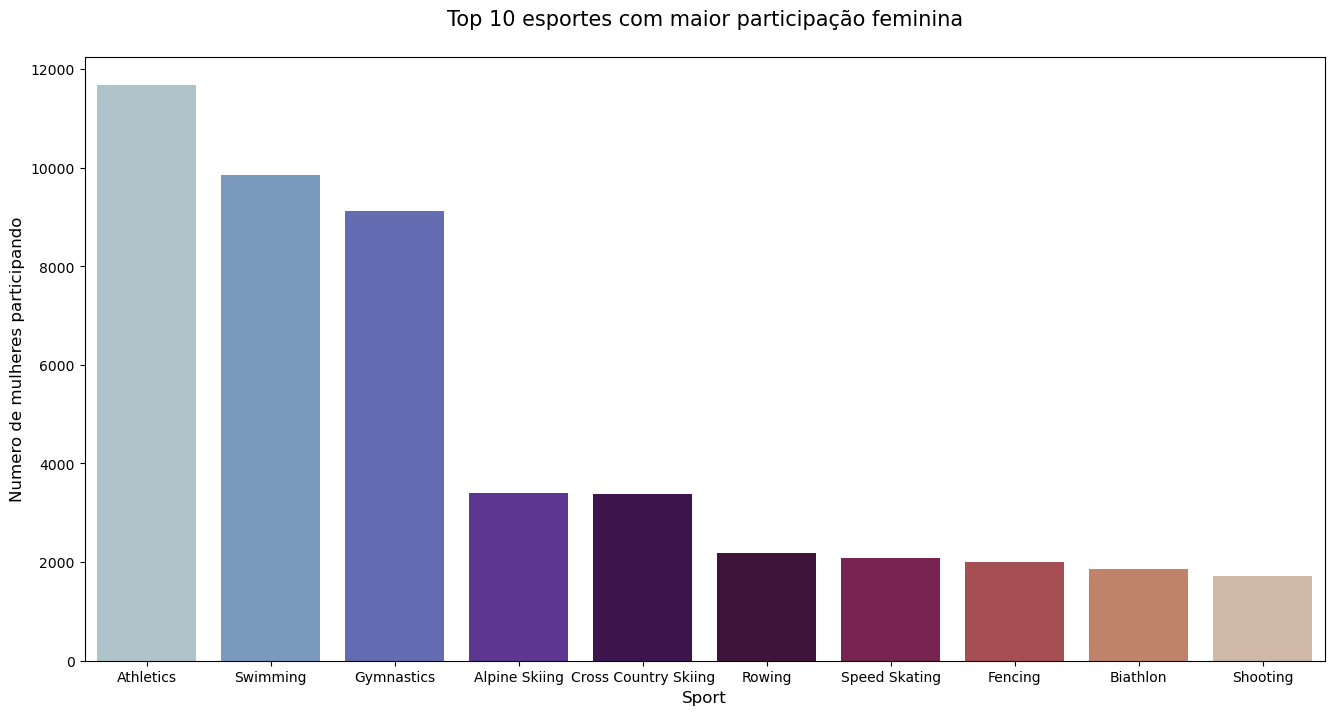

In [33]:
female['Sport'].value_counts()
plt.figure(figsize=(16,8), dpi=100)
sns.barplot(x=female['Sport'].value_counts(ascending=False).head(10).index,
            y=female['Sport'].value_counts(ascending=False).head(10).values, 
            saturation=0.90, palette="twilight")
plt.xlabel("Sport", fontsize=12)
plt.ylabel("Numero de mulheres participando", fontsize=12)
plt.title("Top 10 esportes com maior participação feminina\n", fontsize=15)
plt.show()

Os 3 esportes que mais contam com a participação de mulheres são: Atletismo, Natação e Ginástica. Esses 3 são esportes onde pessoas com um porte físico mais fino se descatam, principalmente na ginástica. Enquanto isso, para os homens:

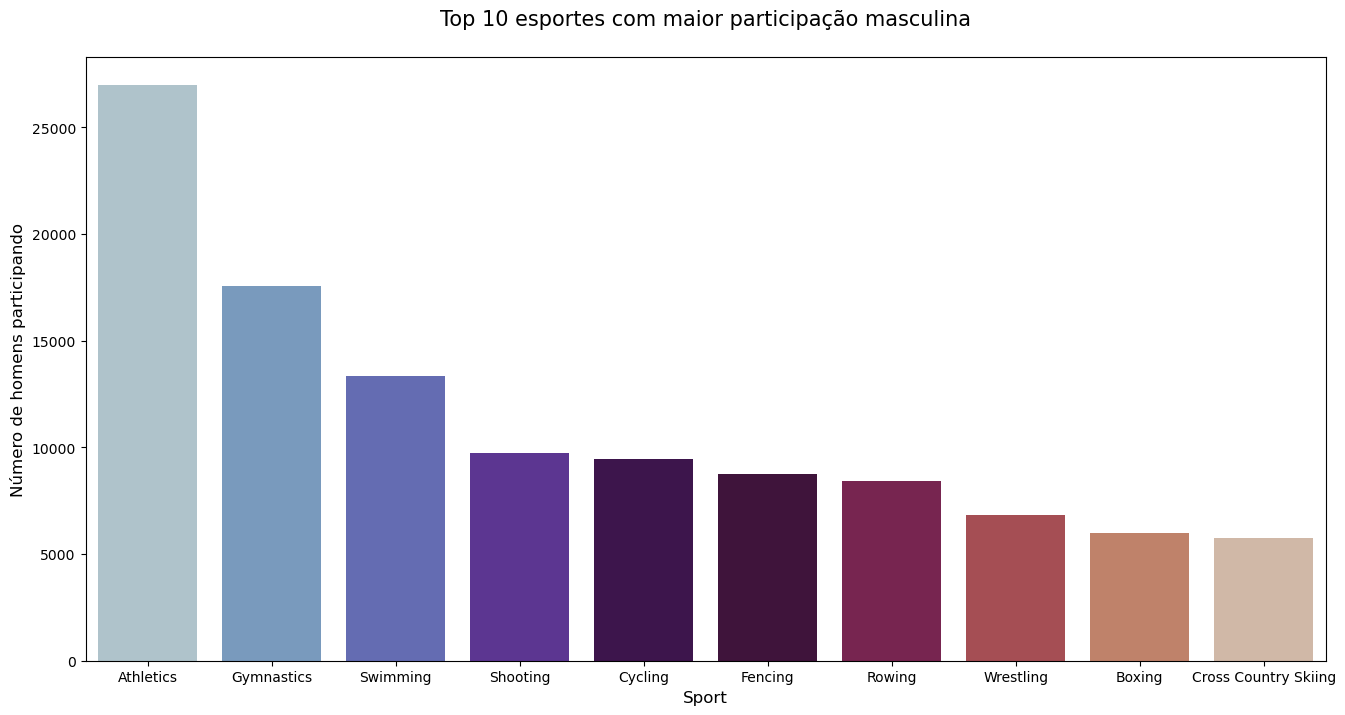

In [34]:
plt.figure(figsize=(16,8), dpi=100)
sns.barplot(x=male['Sport'].value_counts(ascending=False).head(10).index,
            y=male['Sport'].value_counts(ascending=False).head(10).values, 
            saturation=0.90, palette="twilight")
plt.xlabel("Sport", fontsize=12)
plt.ylabel("Número de homens participando", fontsize=12)
plt.title("Top 10 esportes com maior participação masculina\n", fontsize=15)
plt.show()

Apesar do top 3 ser bem parecido, os esportes que se seguem, como Rowing, Wrestling e Boxing, existem um porte físico maior, o que faz com que os valores de altura e peso dos homens tenda a ser maior.

Agora que vimos a distribuição de peso, altura e esportes entre os atletas masculinos e femininos, podemos ir ver os países que mais trazem participantes.

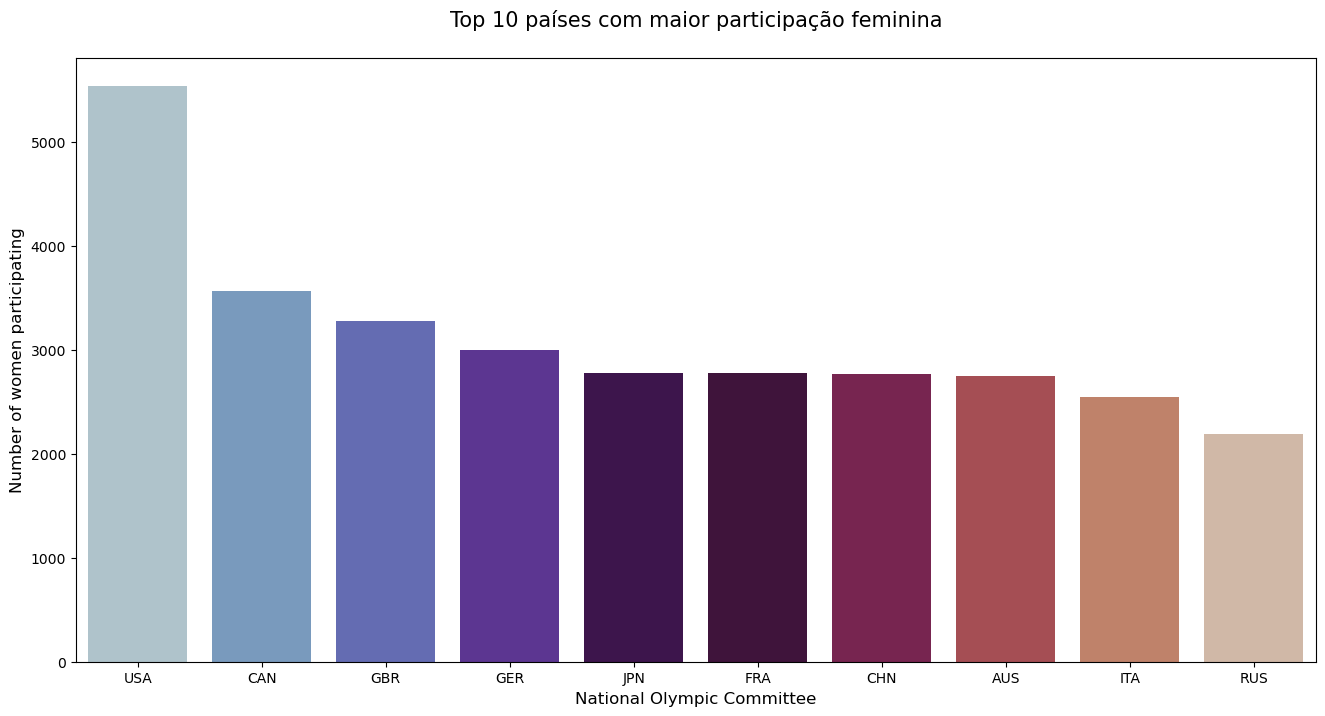

In [35]:
plt.figure(figsize=(16,8), dpi=100)
sns.barplot(x=female['NOC'].value_counts(ascending=False).head(10).index,
            y=female['NOC'].value_counts(ascending=False).head(10).values, 
            saturation=0.90, palette="twilight")
plt.xlabel("National Olympic Committee", fontsize=12)
plt.ylabel("Number of women participating", fontsize=12)
plt.title("Top 10 países com maior participação feminina\n", fontsize=15)
plt.show()

Não é atoa que os Estados Unidos são os maiores campeões históricos. Eles também são aqueles que mais levam competidores para as olimpiadas, tanto no feminino quanto no masculino.

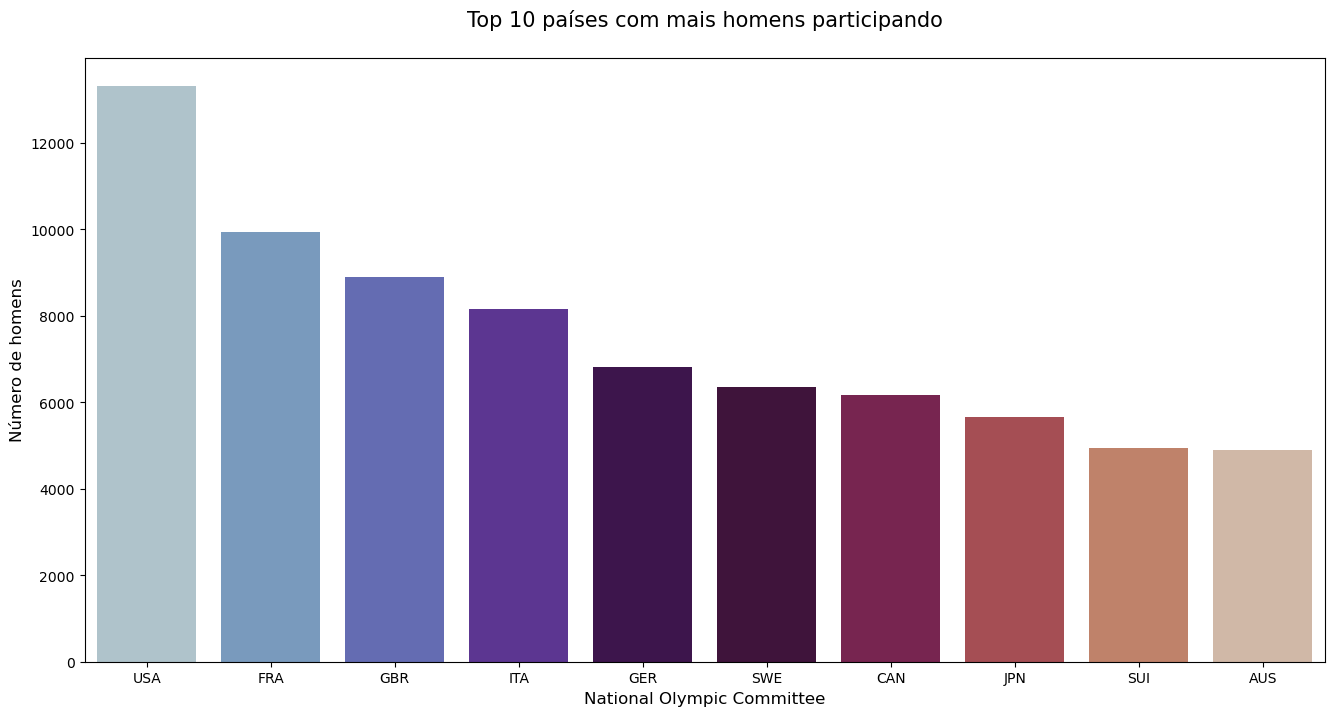

In [36]:
plt.figure(figsize=(16,8), dpi=100)
sns.barplot(x=male['NOC'].value_counts(ascending=False).head(10).index,
            y=male['NOC'].value_counts(ascending=False).head(10).values, 
            saturation=0.90, palette="twilight")
plt.xlabel("National Olympic Committee", fontsize=12)
plt.ylabel("Número de homens", fontsize=12)
plt.title("Top 10 países com mais homens participando\n", fontsize=15)
plt.show()

Agora que já vimos essa breve apresentação dos números e alguns destaques das olimpiadas, uma pergunta será lançada:


<center><h2>Altura e peso influenciam na performance do atleta?</h2></center>
<img src="https://media1.popsugar-assets.com/files/thumbor/wfmzOGtxwOvkyrPJHr9HdN7KfYI/fit-in/1024x1024/filters:format_auto-!!-:strip_icc-!!-/2016/08/22/781/n/1922729/4141ae5c_edit_img__42261806_1471885787_54261684_CnLDapYW8AAIlDp/i/Short-Olympic-Gymnasts-Tall-Athletes-Photos.jpg" 
width=800>
<center>From Twitter, by lzhernandez02</center>

Esta pergunta é interessante, pois dependendo do esporte, altura/peso podem exercer diferentes níveis de influência. Portanto, vimos como necessário separar a análise por esporte.
   
A princípio, calculamos a altura/peso médio dos atletas medalhistas e não medalhistas. Em seguida, realizamos a conta (media_medalhistas - media), para saber quão diferente da média são os medalhistas. Então, transformamos estes valor em uma porcentagem da média. Assim, descobrimos quão acima ou abaixo da média são os atletas medalhistas.

In [37]:
# Método 1: Calcular a média de altura e peso por esporte e comparar com a média dos medalhistas

df_mean_stats = df.groupby("Sport").mean().drop(columns=["ID","Age","Year"]) # Tira a média da Altura e Peso dos atletas de cada esporte
df_medal_mean_stats = df[df["Medal"] != "No medal"].groupby("Sport").mean().drop(columns=["ID","Age","Year"]) # Tira a média da Altura e Peso dos medalhistas de cada esporte

difference = (100*(df_medal_mean_stats - df_mean_stats)/(df_mean_stats)) # Em média, quantos % mais alto/pesado que a média são os medalhistas? 

# Exemplos:
print("Basketball\n"+str(difference.loc["Basketball"]))
print("\nFootball\n"+str(difference.loc["Football"]))
print("\nVolleyball\n"+str(difference.loc["Volleyball"]))
print("\nGymnastics\n"+str(difference.loc["Gymnastics"]))
print("\nAthletics\n"+str(difference.loc["Athletics"]))

Basketball
Height    0.59814
Weight    1.09403
Name: Basketball, dtype: float64

Football
Height    0.027486
Weight    0.286653
Name: Football, dtype: float64

Volleyball
Height   -0.035723
Weight    0.907121
Name: Volleyball, dtype: float64

Gymnastics
Height   -0.541647
Weight   -1.943620
Name: Gymnastics, dtype: float64

Athletics
Height    0.728245
Weight    3.029148
Name: Athletics, dtype: float64


In [38]:
# Método 2: Regressão Linear
sport = "Gymnastics"
df_sport_height_weight = df[df["Sport"] == sport].drop(columns = ["ID","Year",'Name', 'Sex', 'Age','Team', 'NOC', 'Games','Season', 'City', 'Sport', 'Event', 'Medal'])
df_sport_medals = df[df["Sport"] == sport]["Medal"].apply(lambda x: {"No medal": 0, "Bronze": 1, "Silver":2, "Gold":3}[x])

model = LinearRegression().fit(df_sport_height_weight, df_sport_medals)
r_sq = model.score(df_sport_height_weight, df_sport_medals)

print("R^2:",r_sq)
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)
print("predicted response:", model.predict(df_sport_height_weight),sep = "\n")

R^2: 0.0017052024777652885
Intercept: 0.5165274091670216
Slope: [-0.00142275 -0.00200383]
predicted response:
[0.13930141 0.13930141 0.13930141 ... 0.17382779 0.17382779 0.17382779]


Em ambos os métodos, não foram encontradas relações signficativas entre altura/peso e o desempenho dos atletas. Este resultado era esperado em esportes de times, onde há uma maior variedade de biotipos. Porém, o mesmo resultado se repetiu nos caso de esportes como ginástica e atletismo, onde presumia-se que certos biotipos fossem ter vantagem.

### Quão diferente é a Altura e Peso dos atletas nas olimpíadas de Verão e Inverno
Para responder esta pergunta, vamos calcular a altura média dos atletas de verão e inverno. Feito isso, calculamos o coeficiente de variância, para nos certificar que a média é a medida de centralidade adequada.

In [39]:
df_winter = df[df["Season"] == "Winter"]
df_summer = df[df["Season"] == "Summer"]

print("Mean height for winter olympics:",df_winter["Height"].mean())
print("Mean weight for winter olympics:",df_winter["Weight"].mean())

print("\n\nMean height for summer olympics:",df_summer["Height"].mean())
print("Mean weight for summer olympics:",df_summer["Weight"].mean())

print("\n\nCV height for summer olympics:",df_summer["Height"].std()/df_summer["Height"].mean())
print("CV weight for summer olympics:",df_summer["Weight"].std()/df_summer["Weight"].mean())

print("\n\nCV height for winter olympics:",df_winter["Height"].std()/df_winter["Height"].mean())
print("CV weight for winter olympics:",df_winter["Weight"].std()/df_winter["Weight"].mean())

Mean height for winter olympics: 174.54727014159403
Mean weight for winter olympics: 70.82159566355449


Mean height for summer olympics: 175.12828042090115
Mean weight for summer olympics: 70.43194531882364


CV height for summer olympics: 0.05745056404535101
CV weight for summer olympics: 0.19033784984950047


CV height for winter olympics: 0.04546740666468073
CV weight for winter olympics: 0.16277342367868025


Percebemos que os coeficientes de variância não são muito grandes, indicando relativa uniformidade entre os dados.

In [40]:
mean_height = pd.DataFrame({"Summer": [df_summer["Height"].mean()], "Winter": [df_winter["Height"].mean()]})

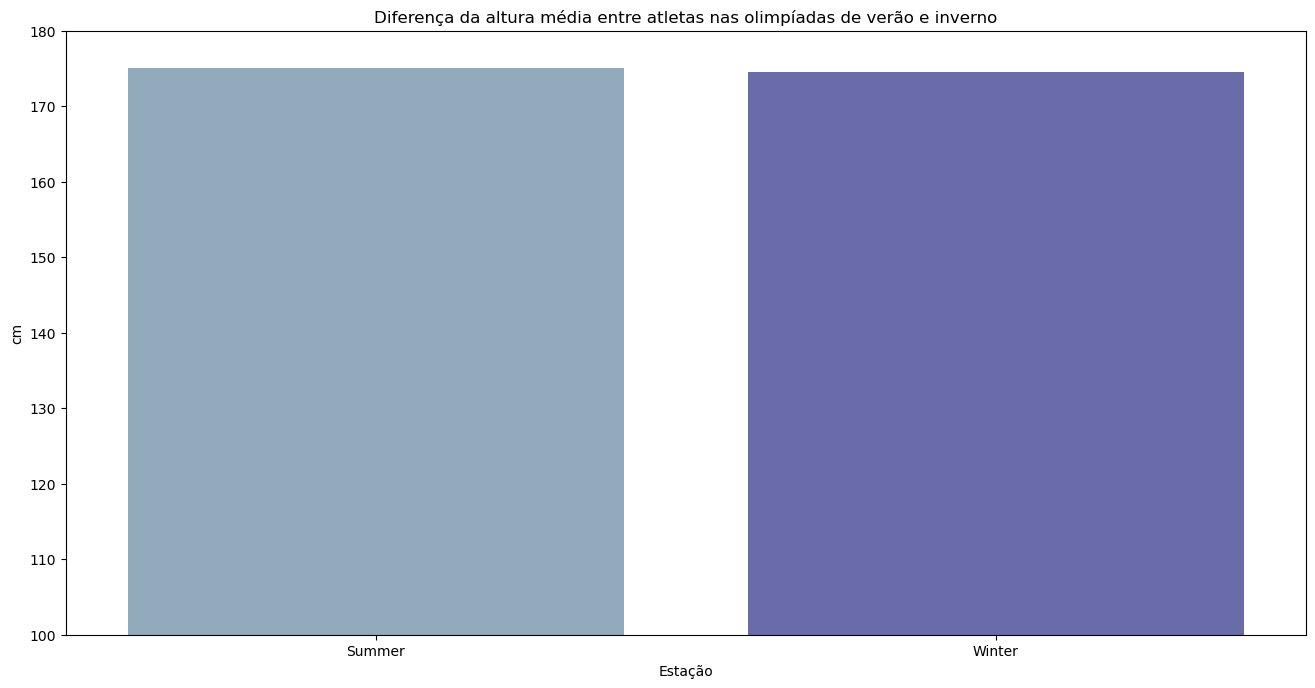

In [41]:
plt.figure(figsize=(16,8), dpi=100)
sns.barplot(data=mean_height).set_title("Diferença da altura média entre atletas nas olimpíadas de verão e inverno")
plt.xlabel('Estação')
plt.ylabel('cm')
plt.ylim(100, 180)
plt.show()

In [42]:
mean_weight = pd.DataFrame({"Summer": [df_summer["Weight"].mean()], "Winter": [df_winter["Weight"].mean()]})

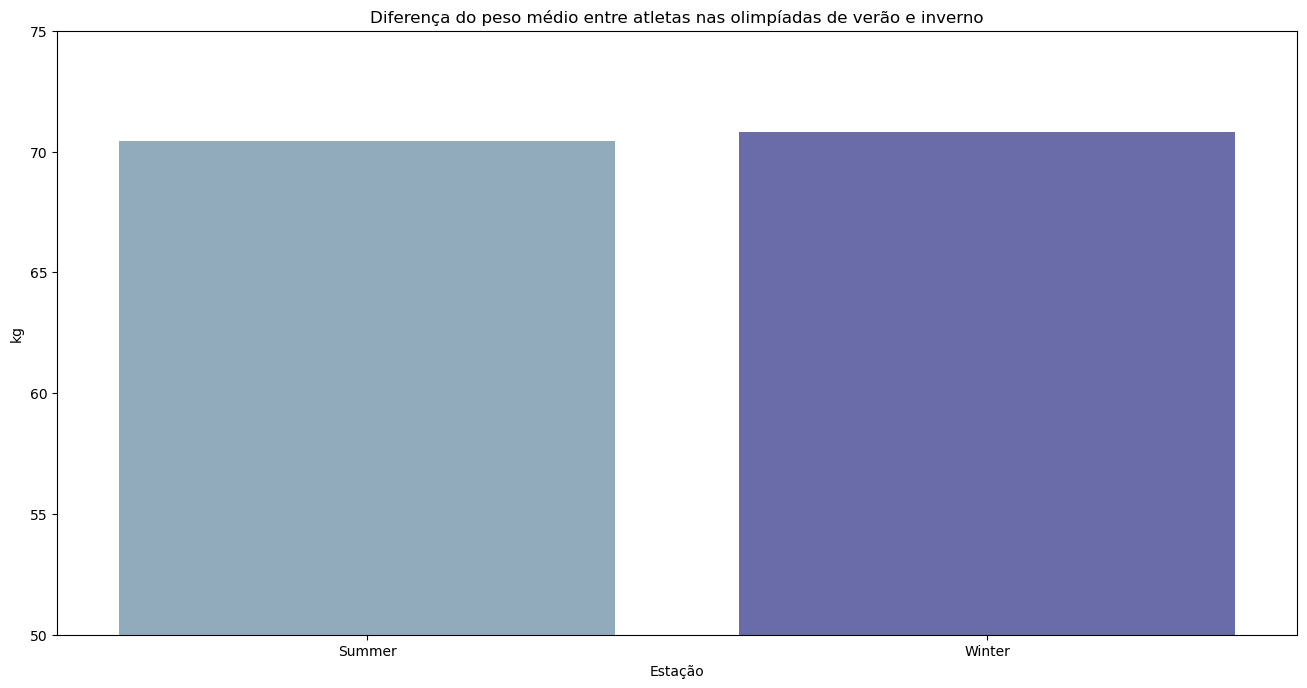

In [43]:
plt.figure(figsize=(16,8), dpi=100)
sns.barplot(data=mean_weight).set_title("Diferença do peso médio entre atletas nas olimpíadas de verão e inverno")
plt.xlabel('Estação')
plt.ylabel('kg')
plt.ylim(50, 75)
plt.show()

Descobrimos que a altura/peso média dos atletas de inverno e verão são relativamente iguais.

Vamos ver agora, os atletas que mais participaram das olimpiadas.

In [44]:
names = pd.DataFrame(df.groupby("Year")["Name"].value_counts())
names.columns = ["Count"]
names = names.reset_index()

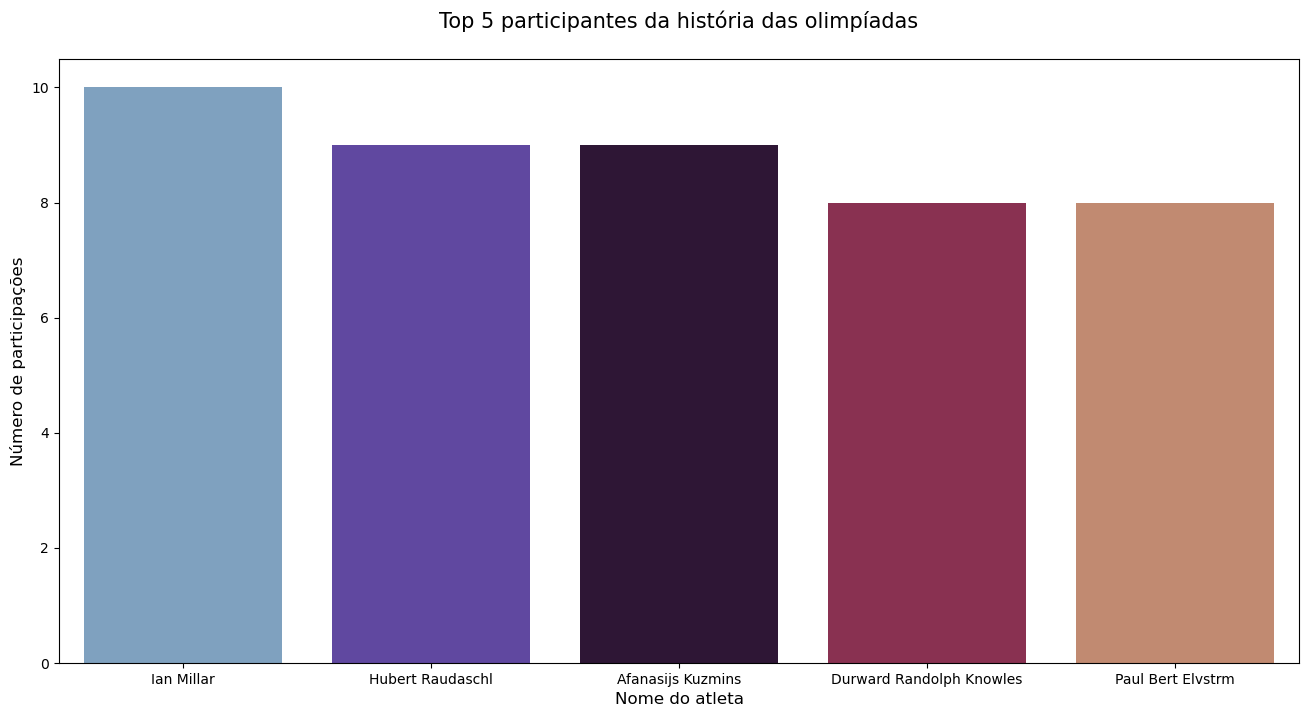

In [45]:
most_frequent = names["Name"].value_counts()

plt.figure(figsize=(16,8), dpi=100)
sns.barplot(x=most_frequent.head(5).index,
            y=most_frequent.head(5).values, 
            saturation=0.90, palette="twilight")
plt.xlabel("Nome do atleta", fontsize=12)
plt.ylabel("Número de participações", fontsize=12)
plt.title("Top 5 participantes da história das olimpíadas\n", fontsize=15)
plt.show()

E por ultimo, para fechar com chave (ou medalha) de ouro, vamos ver quem foram os maiores medalhistas da história: 

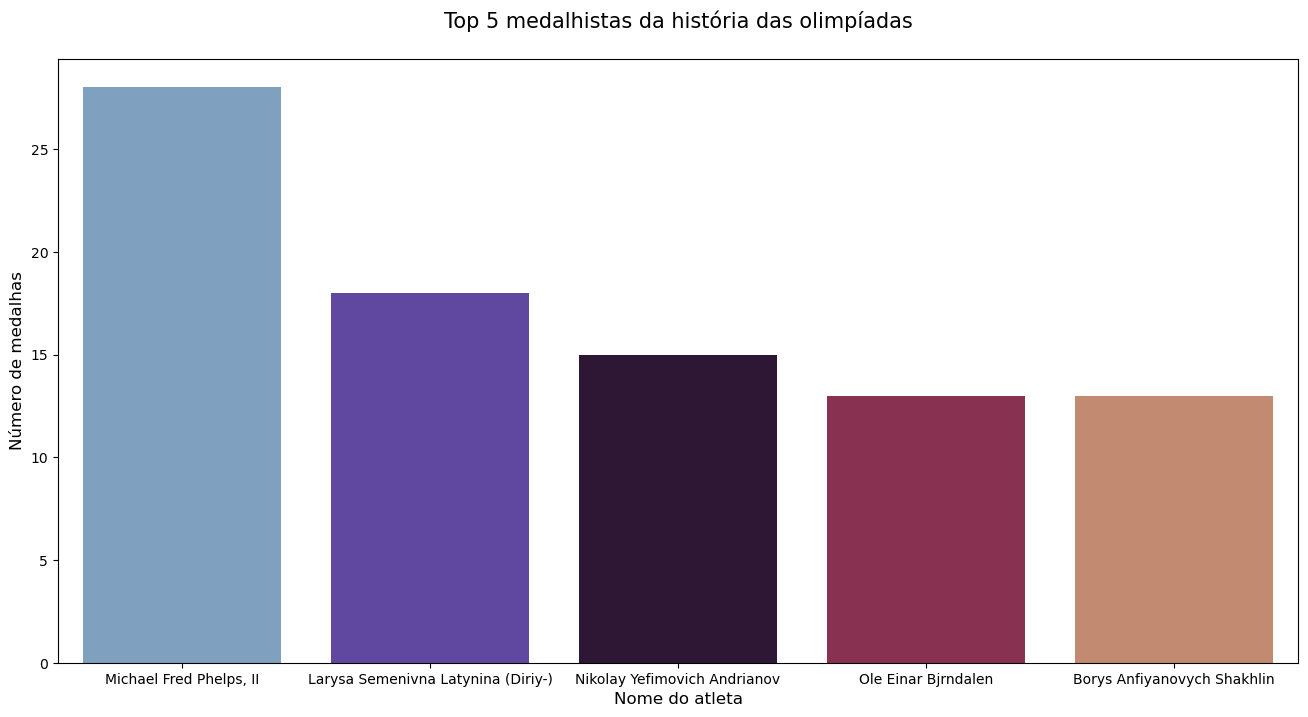

In [46]:
winners = df[df['Medal'] != "No medal"]
winners = winners['Name'].value_counts()

plt.figure(figsize=(16,8), dpi=100)
sns.barplot(x=winners.head(5).index,
            y=winners.head(5).values, 
            saturation=0.90, palette="twilight")
plt.xlabel("Nome do atleta", fontsize=12)
plt.ylabel("Número de medalhas", fontsize=12)
plt.title("Top 5 medalhistas da história das olimpíadas\n", fontsize=15)
plt.show()

Como já era de se esperar, o grande Michael Phelps está em primeiro na lista. O nadador conseguiu acumular 28 merecidas medalhas ao longo de sua carreira, um feito realmente impressionante.

<center><h2>Regressão Linear: Tamanho da Delegação X Número de Medalhas</h2></center>
<img src="https://www.hollywoodreporter.com/wp-content/uploads/2016/08/michael_phelps_opening_ceremony_rio_h_2016.jpg" 
width=800>
<center>From Getty Images, by Cameron Spencer</center>

É de conhecimento geral que não há uma só variável que possa definir o número de medalhas de uma equipe, na realidade exitem muitas e muitas, porém o objetivo aqui é tentar encontrar um modelo simples utilizando apenas uma única variavel, o tamanho da delegação, para prever o número de medalhas de uma dada equipe. 

A regressão linear será o modelo que será utilizado, e ao final, uma predição número de medalhas do Brasil nas Olimpiadas de Tokyo 2020.

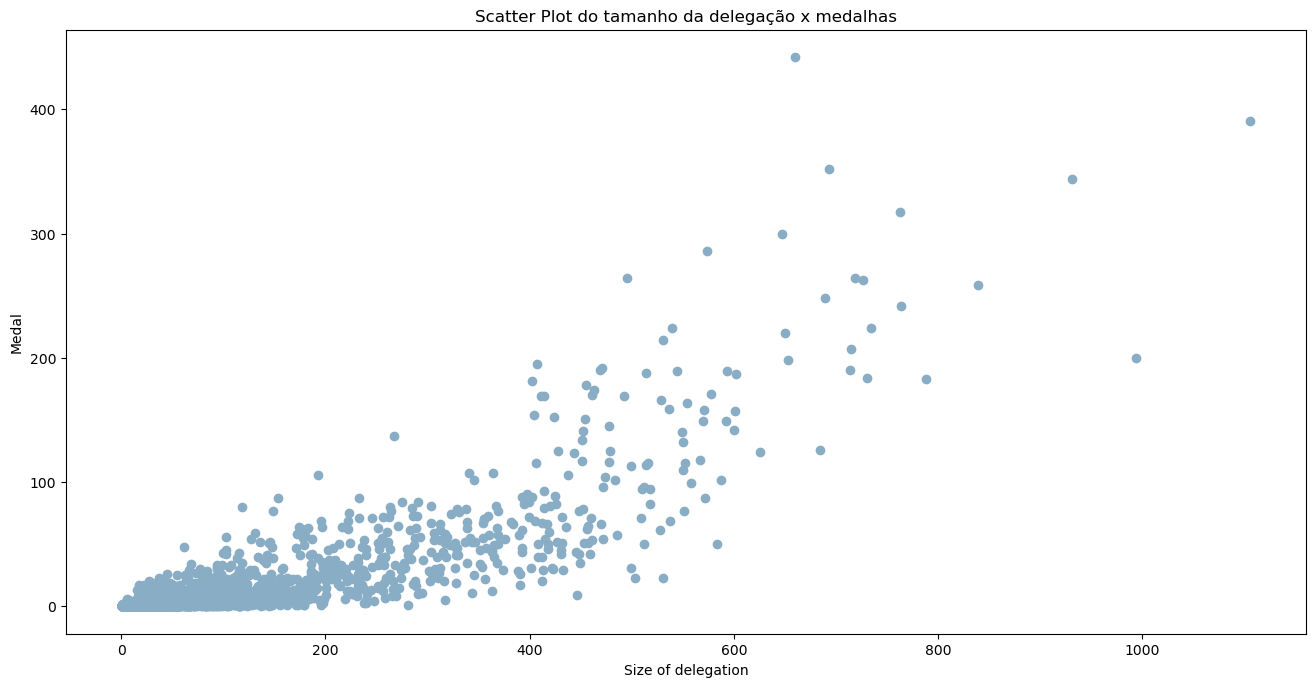

In [47]:
plt.figure(figsize=(16,8), dpi=100)
plt.scatter(x=df_reg["Size_of_Delegation"], y=df_reg["Medal"])
plt.xlabel("Size of delegation")
plt.ylabel("Medal")
plt.title("Scatter Plot do tamanho da delegação x medalhas")
plt.show()

In [48]:
# separando os valores em treino e teste
X_train = df_reg[df_reg["Year"] < 2011]["Size_of_Delegation"].values.reshape(-1, 1)
y_train = df_reg[df_reg["Year"] < 2011]["Medal"].values
X_test = df_reg[df_reg["Year"] > 2011]["Size_of_Delegation"].values.reshape(-1, 1)
y_test = df_reg[df_reg["Year"] > 2011]["Medal"].values

In [49]:
# criando o modelo e predindo para os dados de teste e de treino
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
y_pred_train = model2.predict(X_train)

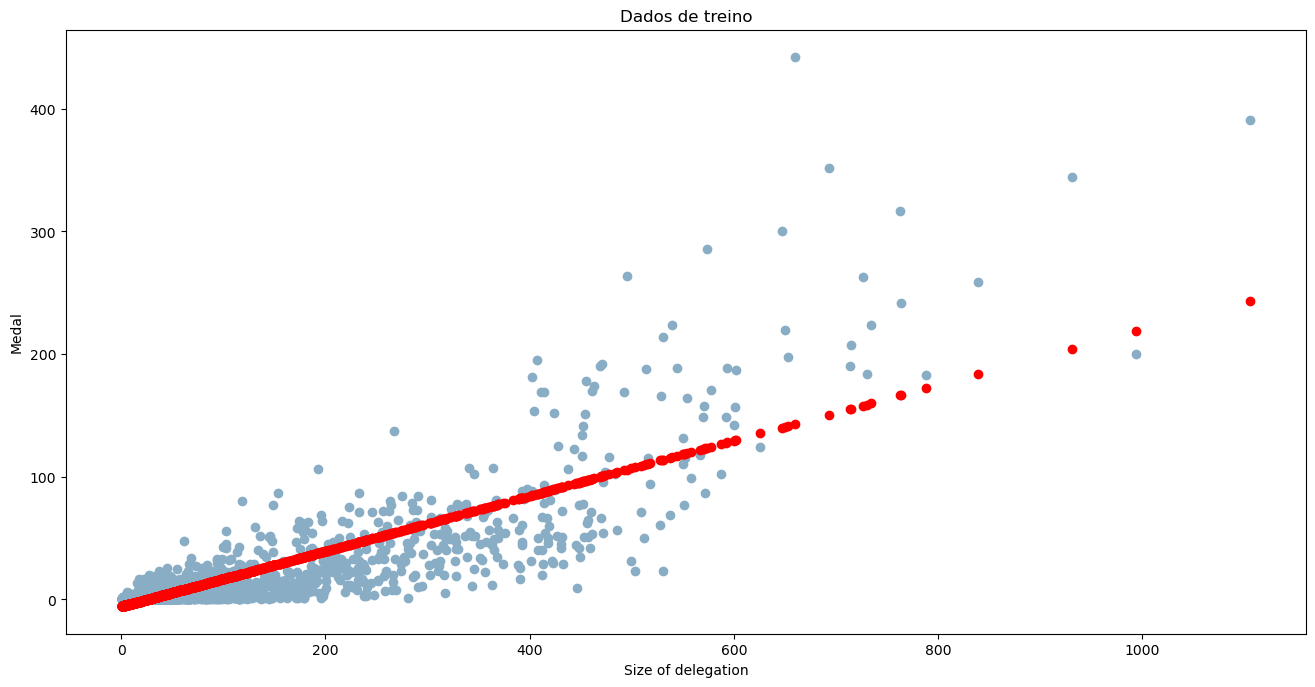

In [50]:
plt.figure(figsize=(16,8), dpi=100)
plt.scatter(x=X_train, y=y_train)
plt.scatter(x=X_train, y=y_pred_train, color="red")
plt.title("Dados de treino")
plt.xlabel("Size of delegation")
plt.ylabel("Medal")
plt.show()

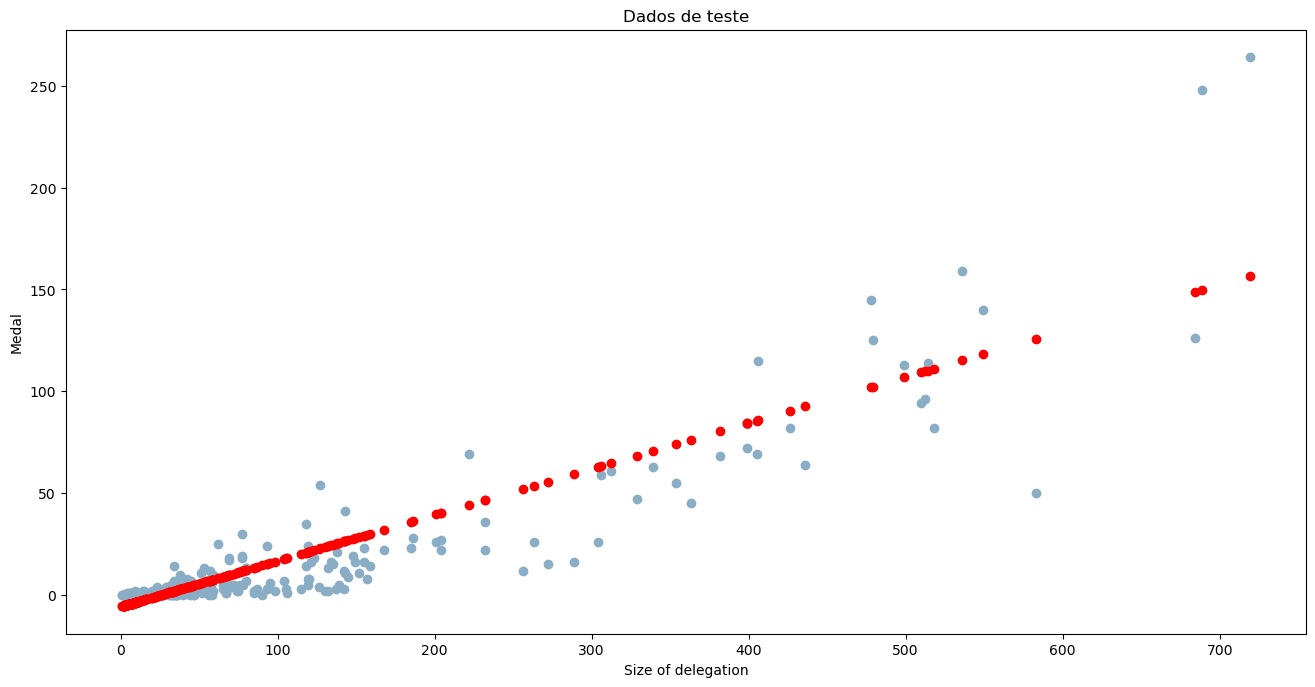

In [51]:
plt.figure(figsize=(16,8), dpi=100)
plt.scatter(x=X_test, y=y_test)
plt.scatter(x=X_test, y=y_pred, color="red")
plt.title("Dados de teste")
plt.xlabel("Size of delegation")
plt.ylabel("Medal")
plt.show()

In [52]:
# avaliando o modelo
print("R²:",model2.score(X_test, y_test))
print("Intercept:", model2.intercept_)
print("Slope:", model2.coef_)

R²: 0.8106882422795876
Intercept: -5.783317582114188
Slope: [0.22554373]


O numero de medalhas é claramente influenciado pelo tamanho da delegação. Ainda assim, existem mais parametros a serem analisados, que talvez possam ser incorporados, como PIB per capita e população, mas, apesar desta regressão ser simples e univariável, o seu coeficiente R² apresenta um ótimo valor.


Antes de prever o número de medalhas do brasil em Tokyo 2020, vamos testar o modelo nas Olimpíadas de Londres 2012.

In [53]:
to_pred = df_reg.query("Year == 2012 & NOC == 'BRA'")

year = to_pred["Year"].values[0]
country = to_pred["NOC"].values[0]
n_2016 = to_pred["Size_of_Delegation"].values


pred_2016 = (model2.predict(np.array([n_2016]))[0]).astype(int)
real_2016 = to_pred["Medal"].values[0]

print(f"Valor previsto do número de medalhas do {country} em {year}: ", pred_2016)
print(f"Valor real do número de medalhas do {country} em {year}: ", real_2016)

Valor previsto do número de medalhas do BRA em 2012:  63
Valor real do número de medalhas do BRA em 2012:  59


Agora vamos prever os valores de Tokyo 2020, e depois das olimpiadas, veremos se acertamos ou não

In [54]:
n_toquio = 307

country = "BRA"
year = "Tokyo 2020"
pred_toquio = model2.predict(np.array([[n_toquio]]))[0].astype(int)

print(f"Valor previsto do número de medalhas do {country} em {year}: ", pred_toquio)

Valor previsto do número de medalhas do BRA em Tokyo 2020:  63


<img src="https://www.rbsdirect.com.br/imagesrc/25628004.jpg?w=1024&h=512&a=c&version=1575255600" 
width=500>
<center>From AFP, by Charly Triballeau</center>

## Conclusões

**Resumo de principais conclusões**

As olimpíadas não foram sempre um evento global, no começo a maioria dos atletas eram europeus ou americanos. Porém, com o passar do tempo, a competição se espalhou para diversos países e continentes. Ainda assim, o continente africano permanece subrepresentado.

No que se refere ao numero de medalhas, os Estados Unidos sempre foram os melhores, mantendo-se na liderança com folga até os dias de hoje. É válido ressaltar que, dos demais países no top 15, 9 são europeus, perpetuando a tendência do início dos jogos.

O percentual de mulheres nos jogos cresceu com o decorrer do tempo, isto é, cada vez mais a mulher tem espaço na competição que outrora era dominada por homens.

Através de técnicas como regressão linear, foi constatado que altura e peso não são fatores determinantes para o sucesso nas olimpíadas. Porém, é extremamente importante notar o viés dos dados: para que um atleta participe das olimpíadas, este dificilmente não se encaixará nos padrões de altura e peso impostos por sua modalidade. Por exemplo, sabemos que a altura é extremamente importante para o basquete, porém, esta importância não é medida adequadamente pela análise, uma vez que atletas baixos de basquete nem chegam a participar dos jogos.

A faixa etária predominante é entre 20-33 anos de idade. Este fato não é surpreendente, uma vez que a maioria dos atletas atingem seu pico de aptidão física nesta idade.

O tamanho da delegação é muito importante para o número de medalhas, pois quanto mais atletas participarem, maior a chance que um deles seja medalhista.

**Limitações**

O primeiro ponto de limitação é o dataset, que contempla apenas os dados mais básicos de cada atleta, impedindo uma análise mais profunda. Em segundo lugar, a falta de conhecimento em técnicas mais avançadas para uma melhor análise também limita a profundida do trabalho.

**Trabalhos futuros**

Realização de uma análise consciente do contexto histórico de cada período de tempo, como por exemplo, as olimpíadas de 1936 e o nazismo, ou a influência da guerra fria nos jogos olimpicos ocorridos entre 1947-1991, bem como outros temas menos debatidos como as competições de arte etc.

**Melhorias que podem ser feitas**

Com mais tempo e estudo, seria possível aprofundar-se mais em certos temas. Por exemplo, a análise da influência de peso e altura no desempenho dos atletas poderia ser melhorada se fosse medido o desvio padrão de altura/peso/idade de cada esporte, uma vez que esportes com maior desvio padrão de altura/peso/idade indicam uma maior gama de possíveis características, e por conseguinte, indicam uma menor importancia destes fatores no desempenho.

Além disso na regressão linear, poderiam ser usadas outras características como: PIB, tamanho da população, IDH etc. para prever o número de medalhas. Ou até mesmo outras técnicas como árvore de decisão, SVM etc.